# Assignment -3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import functools
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score, r2_score
from heapq import heappush, heappop

# Question 1

### Data reading

In [2]:
data = pd.read_csv("data.csv")

In [3]:
display(data.head())
display(data.describe())

,duration,service,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_access_files,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,25,193,441,0,0,0,0,0,0,...,255,1.00,0.00,0.07,0.04,0.00,0.04,0.0,0.0,normal
1,0,38,0,0,0,0,0,0,0,0,...,1,0.00,0.07,0.00,0.00,0.00,0.00,1.0,1.0,dos
2,0,25,167,9724,0,0,0,0,0,0,...,255,1.00,0.00,0.03,0.06,0.00,0.00,0.0,0.0,normal
3,0,20,1339,0,0,0,0,0,0,0,...,31,0.23,0.04,0.23,0.00,0.02,0.00,0.0,0.0,normal
4,0,37,0,0,0,0,0,0,0,0,...,25,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.0,dos


,duration,service,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_access_files,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,24998.000000,24998.000000,2.499800e+04,2.499800e+04,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,...,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000
mean,310.648452,32.024842,2.442409e+04,3.305597e+03,0.193535,0.001200,0.229418,0.251700,0.014841,0.004360,...,182.405832,115.254580,0.520648,0.083117,0.148392,0.032109,0.284272,0.278418,0.118272,0.119189
std,2712.235502,16.493033,2.420103e+06,8.301712e+04,2.127846,0.045594,10.457662,11.545358,0.531652,0.098905,...,99.046209,110.659088,0.449020,0.188442,0.309335,0.111102,0.444531,0.445374,0.306349,0.317858
min,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,25.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,62.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,50.000000,2.790000e+02,5.310000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,70.000000,3.817091e+08,5.150836e+06,77.000000,4.000000,884.000000,975.000000,40.000000,8.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Part 1: PCA
Class PCA it has following functions:
- Standadize to standardize data
- find_eigen_pairs
- reduce_data
- reconstruct_data
- find_error

In [62]:
class PCA:
    def standardize(self, X):
        X_standardized = (X - self.mean) / self.std
        return X_standardized

    def find_eigen_pairs(self, X):
        self.mean, self.std = X.mean(), X.std()
        X = self.standardize(X)
        X = np.array(X)
        self.mean_vec = np.mean(X, axis=0)
        conv_mat = X.T.dot(X)
        #         print(conv_mat)
        eigen_values, eigen_vectors = np.linalg.eig(conv_mat)
        tot = sum(eigen_values)
        eigen_values = [(i / tot) * 100 for i in eigen_values]
        eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i])
                       for i in range(len(eigen_values))]
        eigen_pairs.sort(key=lambda x: x[0], reverse=True)
        self.eigen_pairs = eigen_pairs

    def reduce_dimension(self, X, percent=90):
        X = np.array(self.standardize(X))
        num_dimension = 0
        eigen_values = np.array([i[0] for i in self.eigen_pairs])
        eigen_values = np.cumsum(eigen_values)
        for index, percentage in enumerate(eigen_values):
            if percentage > percent:
                num_dimension = index + 1
                break
        num_features = X.shape[1]
        proj_mat = self.eigen_pairs[0][1].reshape(num_features, 1)
        for eig_vec_index in range(1, num_dimension):
            proj_mat = np.hstack((proj_mat,
                                  self.eigen_pairs[eig_vec_index][1].reshape(
                                      num_features, 1)))
        self.proj_mat = proj_mat
        pca_data = X.dot(proj_mat)
        return pd.DataFrame(pca_data)

    def reconstruct(self, X):
        X = np.array(X)
        X_reconstructed = X.dot(self.proj_mat.T)
        return pd.DataFrame(X_reconstructed)

    def euclid(self, test_row, train_row):
        dis = np.sqrt(
            np.sum([(x - y)**2 for x, y in zip(test_row, train_row)]))
        return dis

    def find_error(self, X_original, X_reconstructed):
        X_original = self.standardize(X_original)
        X_original = np.array(X_original)
        X_reconstructed = np.array(X_reconstructed)
        error = np.sum([
            self.euclid(x, y) for x, y in zip(X_original, X_reconstructed)
        ])
        print(error)
        error /= (2 * X_original.shape[0])
        return error

In [63]:
PCA_data = data.drop(['xAttack'], axis=1)

In [64]:
reducer = PCA()
reducer.find_eigen_pairs(PCA_data)
reduced_data = reducer.reduce_dimension(PCA_data)

In [65]:
print(reduced_data.shape, PCA_data.shape)

(24998, 14) (24998, 29)


In [66]:
reconstructed_data = reducer.reconstruct(reduced_data)
reducer.find_error(PCA_data, reconstructed_data)

31610.96809165736


0.6322699434286215

## Part 2: KMeans Clustering

In [10]:
def convert_categorical_to_numerical(data):
    res = pd.factorize(data)
    x, y = res
    return x, y

In [11]:
reduced_data['xAttack'] = data['xAttack']
array, convert_back_attack_to_categorical = convert_categorical_to_numerical(
    reduced_data['xAttack'])
reduced_data['xAttack'] = array

## Cluster class:
Each cluster maintain few variables:
- points
- mean
- count
- change wether the mean of the point changes or not

There are various functions for clusters:
- add point to cluster
- delete a point from cluster
- calcuate mean of cluster
- purity of cluster

In [52]:
class Cluster:
    def __init__(self, X):
        self.points = None
        self.mean = X
        self.count = 0
        self.change = True

    def add_point(self, X):
        if self.points is None:
            self.points = np.array(X)
            self.points = np.reshape(self.points, (1, -1))
        else:
            self.points = np.vstack([self.points, X])
        self.count += 1

    def delete_point(self):
        if self.points is None:
            return
        if len(self.points) == 1:
            self.points = None
        x = self.points[-1]
        self.points = self.points[:-1]
        self.count -= 1
        return x

    def calculate_mean(self):
        new_mean = np.mean(self.points, axis=0)
        if (new_mean == self.mean).all:
            self.change = False
        else:
            self.change = True
        self.mean = new_mean

    def label(self):
        val, count = np.unique(self.points[:, -1], return_counts=True)
        return val[np.argmax(count)]

    def purity(self):
        val, count = np.unique(self.points[:, -1], return_counts=True)
        return (100.0 * np.max(count)) / np.sum(count)

    def clear_cluster(self):
        self.points = None
        self.count = 0

    def return_class_distribution(self):
        val, count = np.unique(self.points[:, -1], return_counts=True)
        return val, count

    def plot_pie(self, labels):
        val, count = np.unique(self.points[:, -1], return_counts=True)
        labels = [labels[i] for i in val]
        #         print(val, count)
        sizes = [i / np.sum(count) for i in count]
        fig1, ax1 = plt.subplots()
        ax1.pie(
            sizes,
            labels=labels,
            autopct='%1.1f%%',
            shadow=True,
            startangle=90)
        ax1.axis('equal'
                 )  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.legend(loc="best")
        plt.style.use('fivethirtyeight')
        plt.show()

## Kmeans class:
Class maintain the list of clusters and number of clusters.
It has various functions like-
- predict
- fit
- print_purity
- plot_pie
<br>
To handle merging of clusters I've randomly selecting a point from some cluster and assign to the empty cluster

In [51]:
class KMeans:
    def __init__(self, k):
        self.k = k
        self.clusters = []

    def euclid(self, x_point, mean_point):
        dis = np.sum([(x - y)**2 for x, y in zip(x_point, mean_point)])
        dis -= (x_point[-1] - mean_point[-1])**2
        return np.sqrt(dis)

    def make_non_zero_cluster(self, index):
        non_zero_cluster = 0
        for i in range(self.k):
            if self.clusters[i].count > 1:
                non_zero_cluster = i
                break
        random_point = self.clusters[non_zero_cluster].delete_point()
        self.clusters[index].add_point(random_point)

    def fit(self, data, iterations=15):
        random_indexes = random.sample(range(0, len(data)), self.k)
        data = np.array(data)
        for i in random_indexes:
            self.clusters.append(Cluster(data[i]))
        for iteration in range(iterations):
            for i in range(len(self.clusters)):
                self.clusters[i].clear_cluster()
            for row in data:
                distances = np.array(
                    [self.euclid(row, x.mean) for x in self.clusters])
                self.clusters[np.argmax(distances)].add_point(row)
            for i in range(self.k):
                if self.clusters[i].count == 0:
                    self.make_non_zero_cluster(i)
                    self.clusters[i].change = True
                self.clusters[i].calculate_mean()
            change = functools.reduce(lambda a, d: a or d,
                                      [i.change for i in self.clusters], False)
            if not change:
                break

    def print_purity(self):
        for i, cluster in enumerate(self.clusters):
            print("i = {0}, count = {1}, purity = {2}, label = {3} ".format(
                i, cluster.count, cluster.purity(), cluster.label()))

    def plot_pie_chart(self, labels):
        for cluster in self.clusters:
            cluster.plot_pie(labels)

In [40]:
clustering = KMeans(5)
clustering.fit(reduced_data)

In [41]:
clustering.print_purity()

i = 0, count = 3874, purity = 86.39648941662365, label = 1.0 
i = 1, count = 19841, purity = 65.1227256690691, label = 0.0 
i = 2, count = 2, purity = 100.0, label = 0.0 
i = 3, count = 1021, purity = 82.07639569049951, label = 2.0 
i = 4, count = 260, purity = 51.53846153846154, label = 1.0 


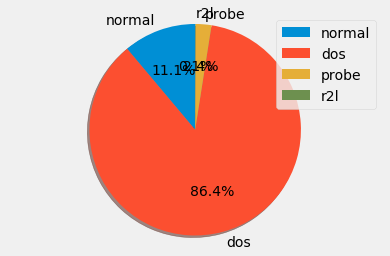

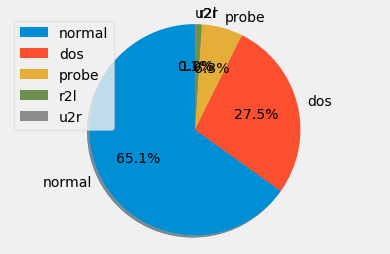

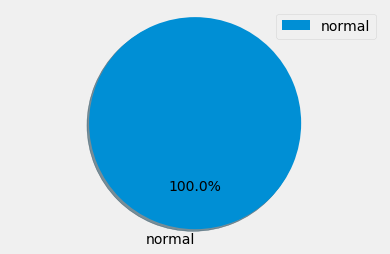

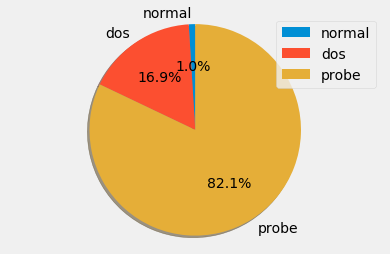

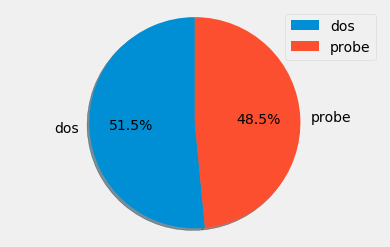

In [42]:
clustering.plot_pie_chart(convert_back_attack_to_categorical)

## Part 3: GMM Clustering

In [43]:
gmm = GaussianMixture(n_components=5)
gmm.fit(reduced_data.drop('xAttack', 1))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [44]:
def euclid(x_point, mean_point):
    #     print(x_point.shape, mean_point.shape)
    dis = np.sum([(x - y)**2 for x, y in zip(x_point, mean_point)])
    return np.sqrt(dis)

i = 0, count = 1357, purity = 48.34193072955048, label = 0.0 


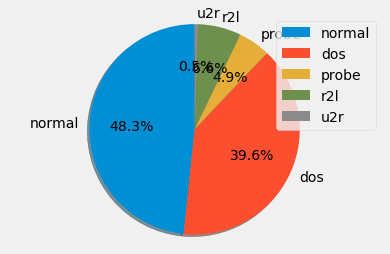

i = 1, count = 11496, purity = 86.28218510786361, label = 0.0 


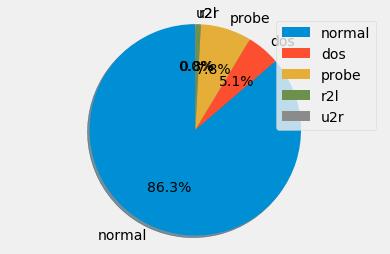

i = 2, count = 6517, purity = 100.0, label = 1.0 


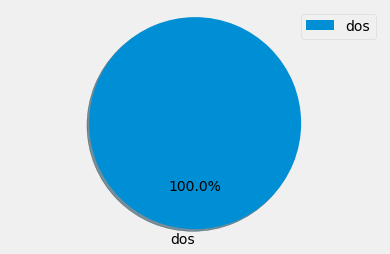

i = 3, count = 8, purity = 100.0, label = 0.0 


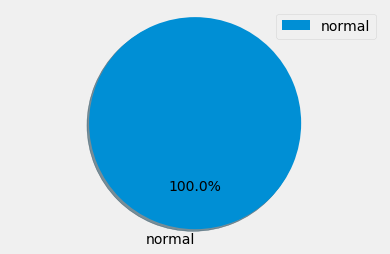

i = 4, count = 5620, purity = 49.48398576512456, label = 0.0 


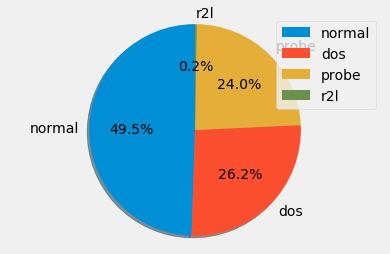

In [45]:
clusters = [Cluster(x) for x in gmm.means_]
reduced_data_np = np.array(reduced_data)
for row in reduced_data_np:
    probs = gmm.predict_proba([row[:-1]])
    clusters[np.argmax(probs)].add_point(row)
for i, cluster in enumerate(clusters):
    print("i = {0}, count = {1}, purity = {2}, label = {3} ".format(
        i, cluster.count, cluster.purity(), cluster.label()))
    cluster.plot_pie(convert_back_attack_to_categorical)

## Part 4: Hierarchical clustering

i = 0, count = 24989, purity = 53.46352395053824, label = 0 


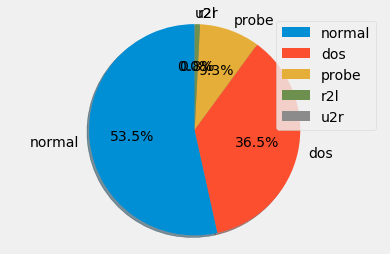

i = 1, count = 1, purity = 100.0, label = 2 


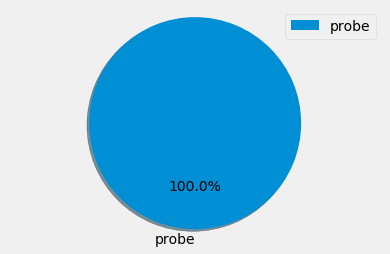

i = 2, count = 6, purity = 66.66666666666667, label = 3 


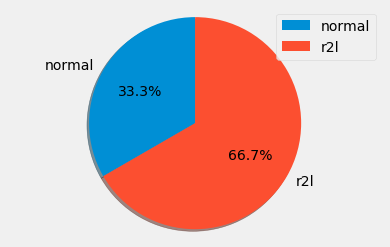

i = 3, count = 1, purity = 100.0, label = 0 


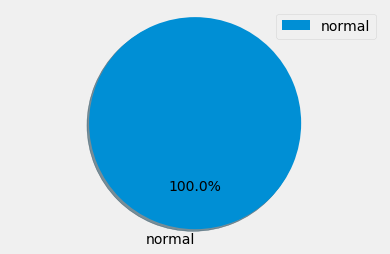

i = 4, count = 1, purity = 100.0, label = 0 


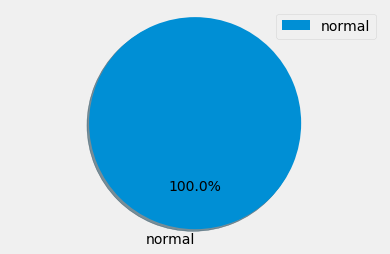

In [46]:
clusters = [Cluster(x) for x in gmm.means_]
cluster = AgglomerativeClustering(
    n_clusters=5, affinity='euclidean', linkage='single')
cluster_return = cluster.fit_predict(reduced_data.drop('xAttack', 1))
lla = reduced_data['xAttack'].values
for entry, label in zip(cluster_return, lla):
    clusters[entry].add_point(label)
for i, cluster in enumerate(clusters):
    print("i = {0}, count = {1}, purity = {2}, label = {3} ".format(
        i, cluster.count, cluster.purity(), cluster.label()))
    cluster.plot_pie(convert_back_attack_to_categorical)

## Part 5
Yes PCA can be used with original data which also contains categorical features along with categorical features, All though it is not useful to do the same.
Data contains all of binary, nominal and ordinal categorical features.
### PCA for Ordinal features:
Following are the possible options to do for ordinal featues :
* Consider ordinal features as numerical features.
* One hot encoding
* Group means: use means of a truncated distribution for variable scores.

### PCA for Binary data:
* Binary data can be considered as ordinal data with only two possible orders. 

### PCA for Nominal data:
* PCA is difficult to be applied on nominal data as no relative ordering may exist between possible values of nominal data.

# Question 2

# Logistic Regression

In [2]:
def sigmoid(x):
    return np.exp(x) / (1 + np.exp(x))


def split_test_train(X, y, percent=0.8):
    mask = np.random.rand(len(X)) < percent
    X_train = X[mask].dropna()
    X_test = X[~mask].dropna()
    y_train = y[mask].dropna()
    y_test = y[~mask].dropna()
    print(X_train.shape, X_test.shape)
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    return X_train, X_test, y_train, y_test


def evaluate_result(y_pred, y_test):
    #     pprint(confusion_matrix(y_test, y_pred))
    #     tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    #     print("tn = {0}, fp = {1}, fn = {2}, tp = {3}".format(tn, fp, fn, tp))
    f1 = f1_score(y_test, y_pred)
    #     print("f1_score\t : ", f1)
    ps = precision_score(y_test, y_pred)
    #     print("precision_score\t : ", ps)
    rs = recall_score(y_test, y_pred)
    #     print("recall_score\t : ", rs)
    acs = accuracy_score(y_test, y_pred)
    #     print("accuracy_score\t : ", acs)
    return np.array([acs, ps, rs, f1])

In [3]:
class LogisticRegression:
    def __init__(self, alpha=0.01, iteration=1000, threshold=0.5):
        self.alpha = alpha
        self.iteration = iteration
        self.threshold = threshold

    def standardize(self, X):
        X_standardized = (X - self.mean) / self.std
        return X_standardized

    def train(self, train_X, train_y):
        self.mean, self.std = train_X.mean(), train_X.std()
        #         print(train_X.shape, train_y.shape, np.unique(train_y))
        train_X = self.standardize(train_X)
        train_X = np.array(train_X)
        ones = np.ones([train_X.shape[0], 1])
        #         train_X = np.concatenate((ones, train_X), axis=1)
        train_X = np.concatenate((train_X, ones), axis=1)
        train_y = np.array(train_y).reshape(len(train_y), 1)
        self.theta = np.zeros([1, train_X.shape[1]])
        self.gradient_Descent(train_X, train_y)

    def gradient_Descent(self, train_X, train_y):
        cost = np.zeros(self.iteration)
        for i in range(self.iteration):
            value = np.dot(train_X, self.theta.T)
            y_hat = sigmoid(value)
            loss = y_hat - train_y
            grad = np.dot(train_X.T, loss) / len(train_y)
            self.theta = self.theta - self.alpha * (grad.T)


#             self.theta = self.theta - (self.alpha / len(train_X)) * (np.dot(
#                 train_X.T,
#                 (sigmoid(np.dot(train_X, self.theta.T))) - train_y)).T
#         print("Gradient Descent")
#             cost[i] = self.cost_function(train_X, train_y)

    def predict(self, test_X):
        y_prob = self.predict_probability(test_X)
        y_pred = [1 if x > self.threshold else 0 for x in y_prob]
        return y_pred

    def predict_probability(self, test_X):
        test_X = self.standardize(test_X)
        test_X = np.array(test_X)
        ones = np.ones((1, len(test_X)))
        test_X = np.concatenate((test_X, ones.T), axis=1)
        y_pred = sigmoid(test_X @ self.theta.T)
        return y_pred.flatten()

    def cost_function(self, X, y):
        y_pred = sigmoid(X @ self.theta.T)
        cost = (-y.T @ np.log(y_pred) -
                (1 - y).T @ np.log(1 - y_pred)) / len(y)
        return cost[0][0]

In [4]:
Admission_data = pd.read_csv('AdmissionDataset/data.csv')
display(Admission_data.head())
Admission_data['Chance of Admit '] = [
    1 if x >= 0.5 else 0 for x in Admission_data['Chance of Admit ']
]
Admission_X = Admission_data.drop(['Serial No.', 'Chance of Admit '], axis=1)
Admission_y = Admission_data[['Chance of Admit ']]
Admission_train_X, Admission_test_X, Admission_train_y, Admission_test_y = split_test_train(
    Admission_X, Admission_y)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,242,317,103,2,2.5,2.0,8.15,0,0.65
1,334,319,108,3,3.0,3.5,8.54,1,0.71
2,4,322,110,3,3.5,2.5,8.67,1,0.80
3,45,326,113,5,4.5,4.0,9.40,1,0.91
4,232,319,106,3,3.5,2.5,8.33,1,0.74


(357, 7) (93, 7)


In [5]:
LGR = LogisticRegression()
LGR.train(Admission_train_X, Admission_train_y)
y_pred = LGR.predict(Admission_test_X)
evaluate_result(Admission_test_y, y_pred)

array([0.88172043, 1.        , 0.88172043, 0.93714286])

### Observations
Accuracy of logistic regression is 0.91

## KNN

In [58]:
display(LGR.theta)

array([[ 0.16232588,  0.18840248,  0.06140222, -0.05544341,  0.18371341,
         0.27217868,  0.07340038,  1.85481986]])

In [6]:
class KNN:
    def fit(self, train_X, train_y, k=3, distance_function=euclid):
        self.train_X = train_X
        self.min_X, self.max_X = train_X.min(), train_X.max()
        self.train_X = self.normalize(self.train_X)
        self.train_y = train_y
        self.k = k
        self.distance_function = distance_function

    def normalize(self, X):
        X_normalized = (X - self.min_X) / (self.max_X - self.min_X)
        return X_normalized

    def predict_row(self, test_row):
        heap = []
        for (index, train_row) in self.train_X.iterrows():
            dis = -self.distance_function(train_row, test_row)
            x = (dis, self.train_y.iloc[index, 0])
            heappush(heap, x)
            if len(heap) > self.k:
                heappop(heap)
        elem, count = np.unique([i for j, i in heap], return_counts=True)
        return elem[np.argmax(count)]

    def predict(self, test_X):
        test_y = pd.DataFrame()
        test_y['predicted'] = [
            self.predict_row(row) for i, row in test_X.iterrows()
        ]
        return test_y

    def evaluate_result(self, y_test, y_pred):
        #         pprint(confusion_matrix(y_test, y_pred))
        f1 = f1_score(y_test, y_pred, average="macro")
        ps = precision_score(y_test, y_pred, average="macro")
        rs = recall_score(y_test, y_pred, average="macro")
        acs = accuracy_score(y_test, y_pred)
        #         print("accuracy_score\t : ", acs)
        return np.array([acs, ps, rs, f1])

    def set_k(self, k):
        self.k = k

NameError: name 'euclid' is not defined

In [60]:
def run_KNN(train_X, test_X, train_y, test_y, k=3, distance_function=euclid):
    classifier = KNN()
    classifier.fit(train_X, train_y, k, distance_function)
    y_predict = classifier.predict(test_X)
    result = classifier.evaluate_result(test_y, y_predict)
    return result

In [61]:
run_KNN(
    Admission_train_X,
    Admission_test_X,
    Admission_train_y,
    Admission_test_y,
    k=5)

/home/aman/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aman/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.91      , 0.455     , 0.5       , 0.47643979])

### Observations
Accuracy of KNN is 0.91
<br>
Accuracy fo both Logistic regression and Knearest neighbour is same. Thus implying the fact that data has good seperable boundaries.

## Precision and Recall vs Threshold

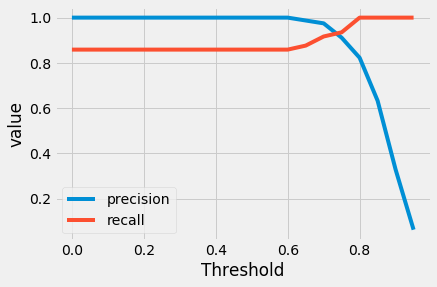

In [38]:
precision = []
recall = []
thresholds = [i * 0.05 for i in range(20)]
for threshold in thresholds:
    LGR = LogisticRegression(threshold=threshold)
    LGR.train(Admission_train_X, Admission_train_y)
    y_pred = LGR.predict(Admission_test_X)
    results = evaluate_result(Admission_test_y, y_pred)
    precision.append(results[1])
    recall.append(results[2])
plt.plot(thresholds, precision, label="precision")
plt.plot(thresholds, recall, label="recall")
plt.legend(loc="best")
plt.ylabel("value")
plt.xlabel("Threshold")
plt.style.use('fivethirtyeight')
plt.show()

### Observations:
- When threshold is less the precision is high as there would be very few predictions for class '1'. As threshold increases the precision tend to become 0 as no row would be classified as class'0'
- When threshold become high recall become high as there would be no False Positives.
- Lower threshold implies low False Negative rate thus high Precision

## Part 3

## Reading and splitting data


In [ ]:
wine_data = pd.read_csv("wine-quality/data.csv", sep=';')
display(wine_data.head())
wine_X = wine_data.drop('quality', 1)
wine_y = wine_data['quality']
wine_train_X, wine_test_X, wine_train_y, wine_test_y = split_test_train(
    wine_X, wine_y)

## One vs One

In [29]:
class One_vs_One:
    def __init__(self):
        self.models = {}

    def standardize(self, X):
        X_standardized = (X - self.mean) / self.std
        return X_standardized

    def fit(self, X, y):
        self.mean, self.std = X.mean(), X.std()
        X = self.standardize(X)
        X['class'] = y
        self.labels = np.unique(y)
        for i in range(0, len(self.labels)):
            for j in range(i + 1, len(self.labels)):
                label1 = self.labels[i]
                label2 = self.labels[j]
                X1 = X.where((X['class'] == label1)
                             | (X['class'] == label2)).dropna()
                X1['class'] = [1 if c == label2 else 0 for c in X1['class']]
                X1 = X1.reset_index(drop=True)
                LR = LogisticRegression()
                LR.train(X1.drop('class', 1), X1['class'])
                self.models[(label1, label2)] = LR

    def predict(self, test_X):
        test_X = self.standardize(test_X)
        results = np.zeros([len(test_X), 1 + max(self.labels)])
        for key in self.models:
            y = self.models[key].predict(test_X)
            for i in range(len(y)):
                results[i][key[y[i]]] += 1
        return np.argmax(results, axis=1)

In [35]:
oneVall = One_vs_All()
oneVall.fit(wine_train_X, wine_train_y)

In [36]:
y_pred = oneVone.predict(wine_test_X)

In [33]:
accuracy_score(y_pred, wine_test_y)

0.5477560414269275

### Observations
Accuracy of one vs one logistic regression is 0.5477560414269275

## One vs All

In [34]:
class One_vs_All:
    def __init__(self):
        self.models = {}

    def standardize(self, X):
        X_standardized = (X - self.mean) / self.std
        return X_standardized

    def fit(self, X, y):
        self.mean, self.std = X.mean(), X.std()
        X = self.standardize(X)
        X['class'] = y
        self.labels = np.unique(y)
        for i in range(0, len(self.labels)):
            X1 = X
            label = self.labels[i]
            X1['class'] = [1 if c == label else 0 for c in X1['class']]
            X1 = X1.reset_index(drop=True)
            LR = LogisticRegression()
            LR.train(X1.drop('class', 1), X1['class'])
            self.models[label] = LR

    def predict(self, test_X):
        test_X = self.standardize(test_X)
        results = np.zeros([len(test_X), len(labels)])
        for key in self.models:
            y = self.models[key].predict_probability(test_X)
            for i in range(len(y)):
                results[i][key] += y[i]
        return np.argmax(results, axis=1)

In [31]:
oneVone = One_vs_One()
oneVone.fit(wine_train_X, wine_train_y)

In [32]:
y_pred = oneVone.predict(wine_test_X)

In [37]:
accuracy_score(y_pred, wine_test_y)

0.5477560414269275

### Observations
Accuracy of one vs all logistic regression is 0.5477560414269275